# Grønlandsdata
### Første udtræk 16/10-17 (data udtrukket med én række pr. individ_type 93x83)
### Andet udtræk 19/10-17 (data udtrukket med flere rækker pr. individ_type 587x12)

In [1]:
#import from regular python

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import seaborn as sb

import os
import re
import getpass

user = getpass.getuser()

if user == "sidsel":
    path = "/home/"+user+"/workspace/DABAI/GL_data"
    
data_frame = pd.read_csv(path+'/apn_data1b-utf8.csv', encoding='iso-8859-1')#, '/apn_data1.csv', encoding='iso-8859-1', sep=';')

### DATA
Data er Grønlandsfangst for arten "GHL" i Kvote "GHL-GRL-47-FK" over perioden 2013-2017<br> 

Kvoto: {Fiskeart(hellefist)-Fangstområdet(Grønland)-Område(47)-Registreretfangstmetode/grænse(Fartøj/Kystnærtfiskeri)} <br>
Individ_type kan være: person, uoplys, A/S eller APS<br>
Licensnr er: Fiskeart-Intern nøgle-Område-Registreret fangstmetode/grænse<br>
Handling kan være: IND (salg) - UDS (udsmid) - null (uoplyst) <br>
Fangst_type kan være: FAN (fangst) - BIF (bifangst) - I dette datasæt er der kun medtaget FAN<br>
Kvote_mængde og licens_mængde er hvor meget der må fanges totalt for året i henholdsvist kvoten (på tværs af licenser) og på licensen <br>
Fanget_mængde er kg fanget på licensen i det år

# Data Exploration

In [2]:
print("Størrelse: ",data_frame.shape,"\n")
data_frame.head()

Størrelse:  (587, 12) 



,INDIVID_TYPE,SE_CPR_NR,NAVN,ART_KODE,KVOTE,LICENSNR,AAR,FANGST_TYPE,HANDLING,KVOTE_MAENGDE,LICENS_MAENGDE,FANGET_MAENGDE
0,APS,ApS 196082,Sermeq Aps,GHL,GHL-GRL-47-FK,GHL-184-47-FK,2013,FAN,IND,1.157701e+07,203848.4317,184140
1,APS,ApS 196082,Sermeq Aps,GHL,GHL-GRL-47-FK,GHL-184-47-FK,2014,FAN,IND,1.096034e+07,204624.4297,182860
2,APS,ApS 196082,Sermeq Aps,GHL,GHL-GRL-47-FK,GHL-184-47-FK,2015,FAN,IND,9.482098e+06,138481.4341,130232
3,APS,ApS 196082,Sermeq Aps,GHL,GHL-GRL-47-FK,GHL-184-47-FK,2016,FAN,IND,1.302787e+07,180230.5999,176941
4,APS,ApS 196082,Sermeq Aps,GHL,GHL-GRL-47-FK,GHL-184-47-FK,2017,FAN,IND,1.491631e+07,252820.9999,58001


## Fordeling over individ_type

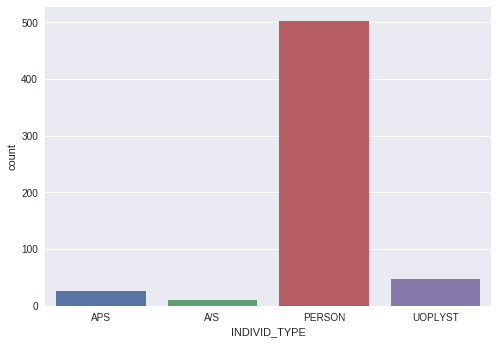

In [3]:
sb.countplot(x='INDIVID_TYPE', data=data_frame)
plt.show()

## Fordeling over Licens numre

93 forskellige licenser
max antal af specifik licens: 11 
min antal af specifik licens: 1


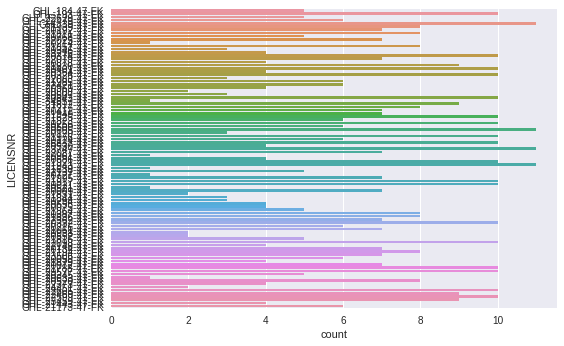

In [4]:
print(data_frame.groupby(['LICENSNR']).size().count(),'forskellige licenser')
print('max antal af specifik licens:',data_frame['LICENSNR'].value_counts().max(),'\nmin antal af specifik licens:',data_frame['LICENSNR'].value_counts().min())
sb.countplot(y='LICENSNR', data=data_frame)
plt.show()

## Fordeling over År

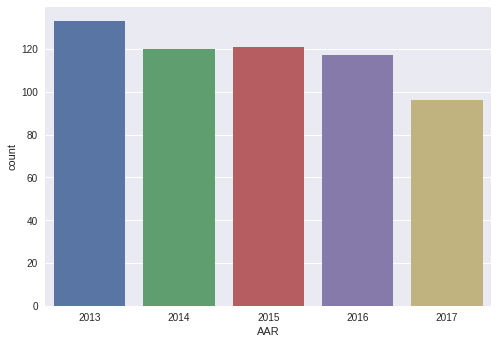

In [5]:
sb.countplot(x='AAR', data=data_frame)
plt.show()

## Barplot over Handling

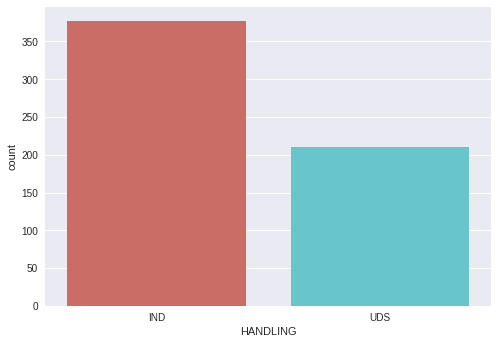

In [6]:
sb.countplot(x='HANDLING', data=data_frame, palette='hls')
plt.show()

## "Mængde" statistik

In [7]:
data_frame.describe()

,AAR,KVOTE_MAENGDE,LICENS_MAENGDE,FANGET_MAENGDE
count,587.000000,5.870000e+02,587.000000,587.000000
mean,2014.868825,1.185442e+07,135947.373283,48221.848382
std,1.396546,1.775959e+06,95315.161609,59988.603477
min,2013.000000,9.482098e+06,0.000344,0.000000
25%,2014.000000,1.096034e+07,72294.639115,658.500000
50%,2015.000000,1.157701e+07,113603.815400,25432.000000
75%,2016.000000,1.302787e+07,170537.605300,78350.500000
max,2017.000000,1.491631e+07,600757.446100,342433.000000


# Data Preprocessing
I dette datasæt er "uoplyst" handling betragtet som IND, og IND optræder derfor flere steder 2 gange for samme licens og år. Dette summeres og dataframen er herefter: 

In [8]:
df = data_frame.groupby(list(data_frame.columns[:-1]),as_index=False)[data_frame.columns[-1]].agg('sum')

Vi omsætter alle kolonner, pånær dem med mængder, til kategoriske kolonner

In [9]:
# Making columns into categories [alt pånær mængder]
for col in df[list(df.columns[0:1])+list(df.columns[3:9])]:
    df[col] = df[col].astype('category')

df.dtypes

INDIVID_TYPE      category
SE_CPR_NR           object
NAVN                object
ART_KODE          category
KVOTE             category
LICENSNR          category
AAR               category
FANGST_TYPE       category
HANDLING          category
KVOTE_MAENGDE      float64
LICENS_MAENGDE     float64
FANGET_MAENGDE       int64
dtype: object

Art_kode, Kvote og Fangst_type er altid det samme, så for overskuelighedens skyld droppes disse:

In [10]:
df = df.drop(['ART_KODE','KVOTE','FANGST_TYPE'], axis=1)

In [11]:
print('Ny størrelse:',df.shape,'\n')
df.head()

Ny størrelse: (564, 9) 



,INDIVID_TYPE,SE_CPR_NR,NAVN,LICENSNR,AAR,HANDLING,KVOTE_MAENGDE,LICENS_MAENGDE,FANGET_MAENGDE
0,A/S,A/S 184991,Royal Greenland A/S,GHL-39-47-FK,2013,IND,1.157701e+07,417616.9949,289549
1,A/S,A/S 184991,Royal Greenland A/S,GHL-39-47-FK,2013,UDS,1.157701e+07,417616.9949,2462
2,A/S,A/S 184991,Royal Greenland A/S,GHL-39-47-FK,2014,IND,1.096034e+07,385565.3016,342433
3,A/S,A/S 184991,Royal Greenland A/S,GHL-39-47-FK,2014,UDS,1.096034e+07,385565.3016,1195
4,A/S,A/S 184991,Royal Greenland A/S,GHL-39-47-FK,2015,IND,9.482098e+06,273150.5779,206569


In [12]:
df2 = pd.get_dummies(df, columns=['INDIVID_TYPE', 'AAR','HANDLING'])
df2.shape

(564, 17)

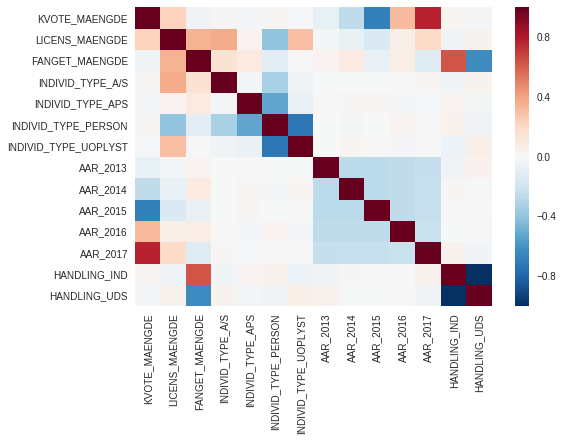

In [13]:
sb.heatmap(df2.corr())
plt.show()

In [14]:
df.to_csv(path+'/GLout.csv')

In [15]:
df2.to_csv(path+'/GL2out.csv')